In [1]:
#2015年版 chapter 8
#70#
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer
path_pos_data="data/rt-polaritydata/rt-polaritydata/rt-polarity.pos"
path_neg_data="data/rt-polaritydata/rt-polaritydata/rt-polarity.neg"
write_file="data/raw_sentiment.txt"
data_file="data/sentiment.txt"
decode = 'cp1252'

with codecs.open(path_pos_data,"r",'cp1252') as pos,codecs.open(path_neg_data,"r",'cp1252') as neg,open(write_file,'w') as sentiment:
    for one_line in pos:
        sentiment.write("+1\t"+one_line)
    for one_line in neg:
        sentiment.write("-1\t"+one_line)

with open(data_file) as check_len:
    count_pos=0
    count_neg=0
    for sentence in check_len:
        tag=sentence.split("\t")[0]
        if tag=="+1":
            count_pos+=1
        elif tag=="-1":
            count_neg+=1       

print("positive sentece",count_pos)
print("negative sentence",count_neg)
print("============================")
#gshuf raw_sentiment.txt > sentiment.txt  make suhuffle data
!head -n 5 data/raw_sentiment.txt
print("============================")
!head -n 5 data/sentiment.txt

positive sentece 5331
negative sentence 5331
+1	the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . 
+1	the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth . 
+1	effective but too-tepid biopic
+1	if you sometimes like to go to the movies to have fun , wasabi is a good place to start . 
+1	emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one . 
-1	it's loud and boring ; watching it is like being trapped at a bad rock concert . 
-1	there is so much plodding sensitivity . 
-1	an unsatisfying hybrid of blair witch and typical stalk-and-slash fare , where the most conservative protagonist is always the last one living . 
+1	the sight of the 

In [2]:
#71#
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS,CountVectorizer
print("length of stop words list =",len(ENGLISH_STOP_WORDS))
print("Stop words list",list(ENGLISH_STOP_WORDS)[::10])
Stop_words=set(ENGLISH_STOP_WORDS)



def check_stop_words(sentence):
    vect=CountVectorizer()
    vect.fit(list(sentence.split("\n")))
    words_dic_of_sentence=vect.vocabulary_
    intersection_keys = words_dic_of_sentence.keys() & Stop_words  
    #intersection_keys has stop words included in a sentence
    if len(intersection_keys) > 1:
        return True
    else:
        return False


check_stop_words("the sight of the spaceship on the launching pad is duly impressive in imax dimensions , as are shots of the astronauts floating in their cabins . ")


length of stop words list = 318
Stop words list ['am', 'might', 'all', 'onto', 'amongst', 'where', 'last', 'being', 'full', 'whence', 'cant', 'we', 'been', 'nor', 'along', 'seemed', 'would', 'couldnt', 'that', 'the', 'was', 'becomes', 'hereby', 'our', 'eg', 'after', 'seem', 'fifteen', 'yours', 'hereupon', 'else', 'meanwhile']


True

In [3]:
#easy example for TfidfVectorizer
sents_list=[]

sentences=["+1	has enough gun battles and throwaway humor to cover up the yawning chasm where the plot should be . "
              ,"-1	there is so much plodding sensitivity . "]
for one_sentence in sentences:
        sentence=one_sentence.split("\t")[1]
        sents_list.append(sentence)

vec_tfidf = TfidfVectorizer(stop_words=list(Stop_words))
#We can specify stop_wrods list by argument
text_vec = vec_tfidf.fit_transform(sents_list)   
text_vector_sparse = text_vec.toarray() 

#visualize
print("vector 1",text_vector_sparse[0])
print("vector 2",text_vector_sparse[1]) #plodding and sensitivity become vector

print(vec_tfidf.vocabulary_)



vector 1 [0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.
 0.35355339 0.         0.35355339 0.35355339]
vector 2 [0.         0.         0.         0.         0.         0.70710678
 0.         0.70710678 0.         0.        ]
{'gun': 3, 'battles': 0, 'throwaway': 8, 'humor': 4, 'cover': 2, 'yawning': 9, 'chasm': 1, 'plot': 6, 'plodding': 5, 'sensitivity': 7}


In [4]:
#72#
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# use sklearn Tfidf module and make sparse vector as feature

with open(data_file) as sentences:
    sents_list = []
    label_list = []
    for one_sentence in sentences:
        sentence = one_sentence.split("\t")[1]
        label = one_sentence.split("\t")[0]
        sents_list.append(sentence)
        label_list.append(label)

    vec_tfidf = TfidfVectorizer(stop_words=list(Stop_words))
    # We can specify stop_wrods list by argument
    text_vec = vec_tfidf.fit_transform(sents_list)   
    text_vector_sparse = text_vec.toarray() # make tf-idf vec  (very sparse!!)

print("vector shape",text_vector_sparse.shape)





vector shape (10662, 18041)


In [5]:
# 73
import warnings
from sklearn.linear_model import LogisticRegression


warnings.simplefilter('ignore')
train_x = text_vector_sparse
train_y = np.array(label_list)

model = LogisticRegression()
results = model.fit(train_x,train_y)

print("Train set acc score =",results.score(train_x,train_y))

Train set acc score = 0.9046145188519977


In [6]:
# 74
probs = model.predict_proba(train_x)
pred = model.predict(train_x)

print(probs,probs.shape)
print(pred)

# first proba = "+1"
# second proba = "-1"


[[0.04913851 0.95086149]
 [0.26489672 0.73510328]
 [0.498881   0.501119  ]
 ...
 [0.21260802 0.78739198]
 [0.76046863 0.23953137]
 [0.66698872 0.33301128]] (10662, 2)
['-1' '-1' '-1' ... '-1' '+1' '+1']


In [7]:
# 75
param = model.coef_
print(param)
print(param.shape) #vocaburaly dimension weights
print("=============================")

decend_index = np.argsort(param)
vocab_sorted = sorted(vec_tfidf.vocabulary_.items(), key = lambda x:x[1])

top_feature_list = [vocab_sorted[i][0] for i in decend_index[0][:10]]
print("top_feature_list\n",top_feature_list)
print()
worst_feature_list = [vocab_sorted[i][0] for i in decend_index[0][-10:]]
print("worst_feature_list\n",worst_feature_list)




[[ 0.13290283  0.17617355  0.18759771 ... -0.14357369  0.09578874
   0.13241078]]
(1, 18041)
top_feature_list
 ['performances', 'entertaining', 'enjoyable', 'heart', 'best', 'fun', 'powerful', 'solid', 'cinema', 'wonderful']

worst_feature_list
 ['tries', 'script', 'flat', 'tv', 'feels', 'fails', 'worst', 'boring', 'dull', 'bad']


In [8]:
# 76
import csv
results_write="results/pred_and_gold.txt"


train_y = np.array(label_list)
pred = model.predict(train_x)
with open(results_write,"w") as write_file:
    for gold_label,pred_label in zip(train_y,pred):
        write_file.write("{}\t{}\n".format(str(gold_label), str(pred_label)))
        
!head -n 5 results/pred_and_gold.txt


-1	-1
-1	-1
-1	-1
+1	+1
+1	-1


In [9]:
#77
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score


train_y = [1 if i == "+1" else 0  for i in label_list]
pred = model.predict(train_x)
pred = [1 if i == "+1" else 0  for i in pred.tolist()]
cm = confusion_matrix(train_y, pred)
print(cm)

#                Predicted
#                  Negative  Positive
# Actual Negative     TN        FP
#        Positive     FN        TP

print("accuracy_score",accuracy_score(train_y,pred))    #(TN+TP)/(TN+FP+FN+TP)
print("recall=",recall_score(train_y,pred))             #TP/(TP+FP)
print("precision_score=",precision_score(train_y,pred)) #TP/(TP+FN)
print("f1_score=",f1_score(train_y,pred))               #2*TP/(2*TP+FP+FN)


[[4837  494]
 [ 523 4808]]
accuracy_score 0.9046145188519977
recall= 0.9018945788782592
precision_score= 0.9068276122218031
f1_score= 0.9043543684755007


In [10]:
import mglearn
print(mglearn.plots.plot_grid_search_overview())
#there are hyper parameter C in this model. So I use grid search for finding vest combination.

None


In [11]:
#78 logistic regression
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

warnings.simplefilter('ignore')
train_y = np.array(label_list)
param_grid = {'C': [0.001,0.01,0.1,1,10]} #hyper parameter
grid = GridSearchCV(LogisticRegression(),param_grid,cv=5)#cv is a number of split

x_train, x_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.2,
                                                    train_size=0.8,random_state=0)
grid.fit(x_train,y_train)

print("Best cross-validation score:" ,grid.best_score_)
print("Best parameters",grid.best_params_)
print("Test set score:", grid.score(x_test,y_test))

Best cross-validation score: 0.7507327939969516
Best parameters {'C': 1}
Test set score: 0.7655883731833099


In [12]:
#linearSVM
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

#gamma is parameter of kernel 
#C is parameter of reguralrize
#kernelSVM is too heavy so I use Linear SVM
#5*5 = 25 

param_grid = {'C': [0.001,0.01,0.1,1,10]} #hyper parameter
grid = GridSearchCV(LinearSVC(),param_grid,cv=5)#cv is a number of split

x_train, x_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.2,
                                                    train_size=0.8,random_state=0)
grid.fit(x_train,y_train)

print("Best cross-validation score:", grid.best_score_)
print("Best parameters", grid.best_params_)
print("Test set score:", grid.score(x_test,y_test))

Best cross-validation score: 0.749560323601829
Best parameters {'C': 0.1}
Test set score: 0.7674636661978435


In [15]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.2,
                                                    train_size=0.8,random_state=0)
model= GaussianNB()
y_train = [1 if i == "+1" else 0  for i in y_train]
y_test = [1 if i == "+1" else 0  for i in y_test]
y_pred = model.fit(x_train, y_train).predict(x_test)
print("Test set score:",precision_score(y_test,y_pred))
#低そう

Test set score: 0.6254826254826255


Text(0, 0.5, 'Recall')

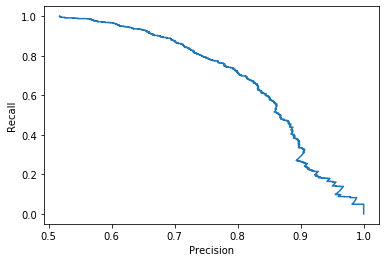

In [39]:
#79
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,
                                               train_size=0.8,random_state=0)

y_train = [1 if i == "+1" else 0  for i in y_train]
y_test = [1 if i == "+1" else 0  for i in y_test]


# print(len(y_test))
# print((model.predict_proba(x_test)))
probs = [x[1] for x in model.predict_proba(x_test).tolist()]

model = LogisticRegression(C = 1).fit(x_train,y_train)
precision,recall,thresholds = precision_recall_curve((y_test),probs)

plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")